# Exersice 1
We are going to work on linear regression
initially we will work on 2d points and then expand it out to 3d.

In [31]:
import numpy as np
import open3d as o3d
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Generate 'random' data
np.random.seed(0) #random always produces the same output
x = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * x + res                  # Actual values of Y

We can use Linear regression from the *sklearn* package.
Here we setup the model to fit to x and y.

In [32]:
x_r = x.reshape(-1,1) #fit needs x in this shape
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(x_r, y)

We can now predict new outcomes given new data.

In [33]:
# Draw a new datapoint
tst_x = 2.5 * np.random.randn(1).reshape(-1,1) + 1.5
print(tst_x)
resulting_y = model.predict(tst_x)
print(resulting_y)

[[0.57704541]]
[2.18951787]


Drawing 200 new samples and plotting them as a line shows us that we have gotten a decent fit.

<IPython.core.display.Javascript object>


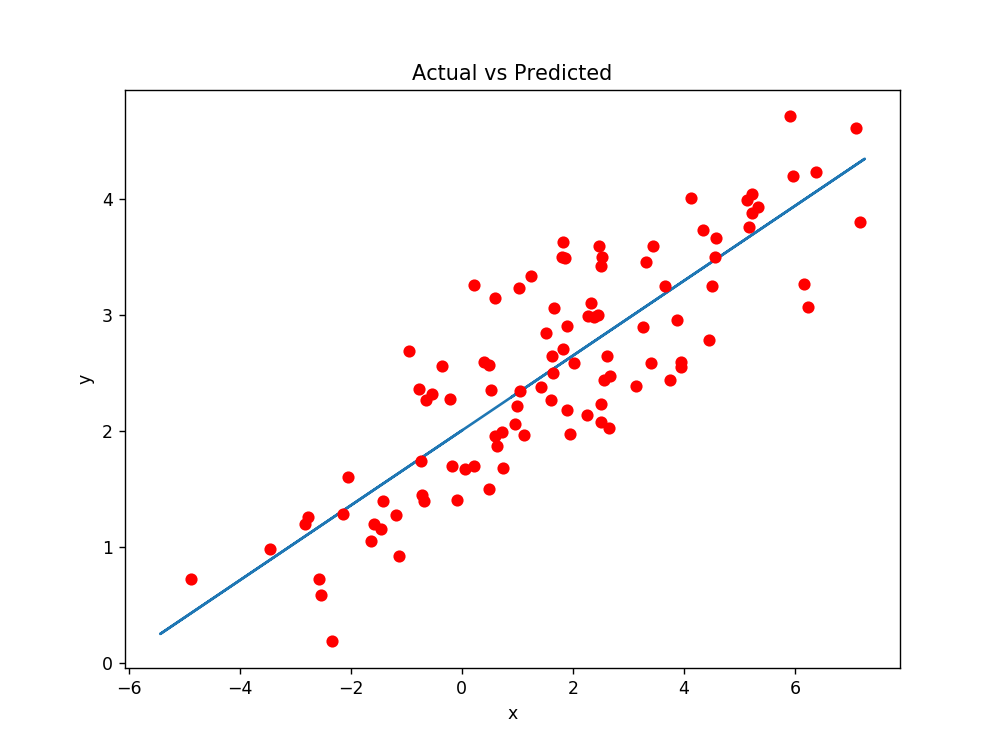

In [34]:
new_x = 2.5 * np.random.randn(200).reshape(-1,1) + 1.5   
predicted = model.predict(new_x)
plt.figure(figsize=(8, 6))
plt.plot(new_x, predicted)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercises
### A
Using Ordinary Least squares attempt to get a regression line that is equal to the one sklearn provides.

Assuming
Yₑ = α + β X

![ols.gif](ols.gif "ols")

- β = Cov(X, Y) / Var(X).
- α = mean(Y)-β*mean(X)

<IPython.core.display.Javascript object>


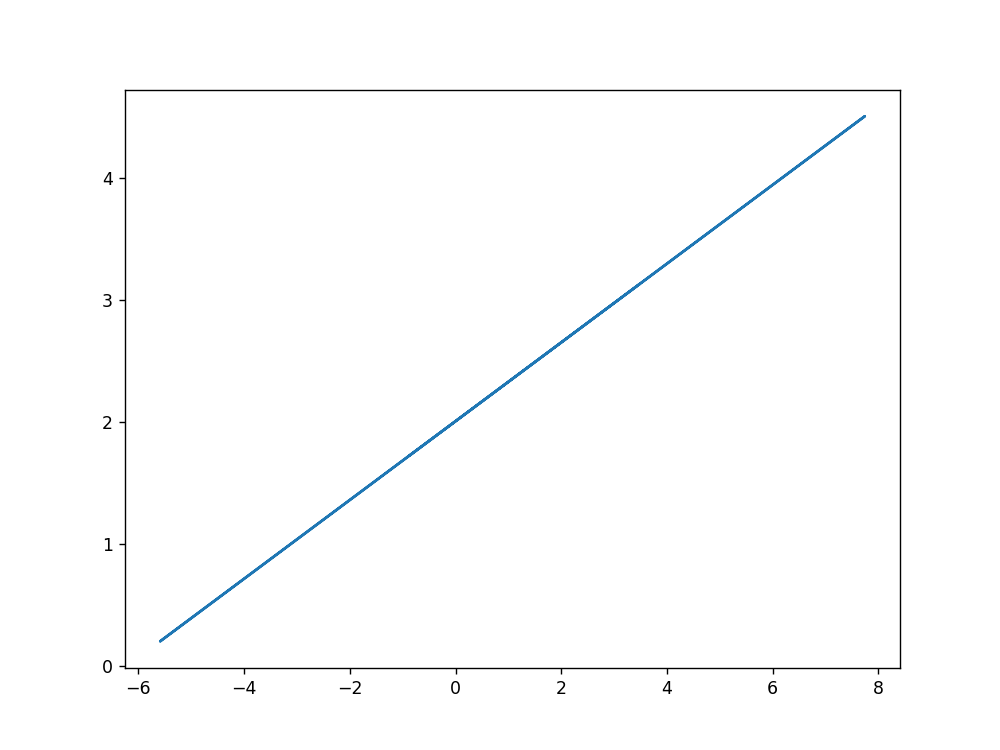

In [36]:
beta = 0
den=0
num=0
x_mean = np.mean(x)
y_mean = np.mean(y)
for i in range(len(x)):
    num += (x[i] - x_mean)*(y[i] - y_mean)
    den += (x[i] - x_mean)**2
beta = num/den
alpha = np.mean(y) - beta*np.mean(x)

y_ols = alpha + beta*x_r

new_x_ols = 2.5 * np.random.randn(200).reshape(-1,1) + 1.5
predicted_y = alpha + beta*new_x_ols
plt.figure(figsize=(8, 6))
plt.plot(new_x_ols, predicted_y)
# cov = np.cov((x,y)) # 4x4 matrix
# var = np.var(x) # value
# beta = cov/var
# alpha = np.mean(y) - beta*np.mean(x) #4x4

# lm_ols = LinearRegression()
# model_ols = lm.fit(x_r, y_ols)

# tst_x_ols = 2.5 * np.random.randn(1).reshape(-1,1) + 1.5
# print(tst_x_ols)
# resulting_y_ols = model.predict(tst_x_ols)
# print(resulting_y_ols)

# new_x_ols = 2.5 * np.random.randn(200).reshape(-1,1) + 1.5   
# predicted_ols = model.predict(new_x_ols)
# plt.figure(figsize=(8, 6))
# plt.plot(new_x_ols, predicted_ols)     # regression line
# plt.plot(x, y, 'ro')   # scatter plot showing actual data
# plt.title('Actual vs Predicted')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

### B
Extend what we have shown above to 3D predict a plane using Linear regression given a point cloud.

Planes can be plotted with 
```{Python}
x = np.linspace(start, end, n)
y = np.linspace(start, end, n)
xx, yy = np.meshgrid(x_t, y_t)

ax.plot_surface(xx, yy, predicted_zz, alpha=0.2)
```

<IPython.core.display.Javascript object>


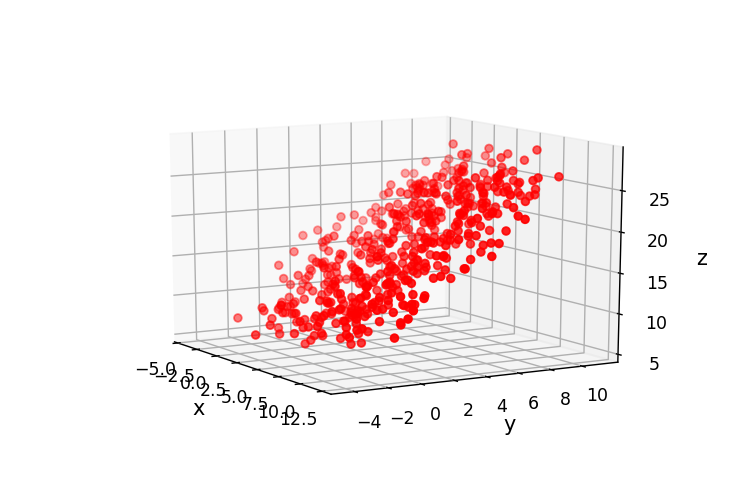

In [98]:
# Creating a pointcloud.
pc = o3d.io.read_point_cloud("TestData/spread_points.ply")
xyz = np.asarray(pc.points)

fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], color = 'red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()

-3.740100637951779


<IPython.core.display.Javascript object>


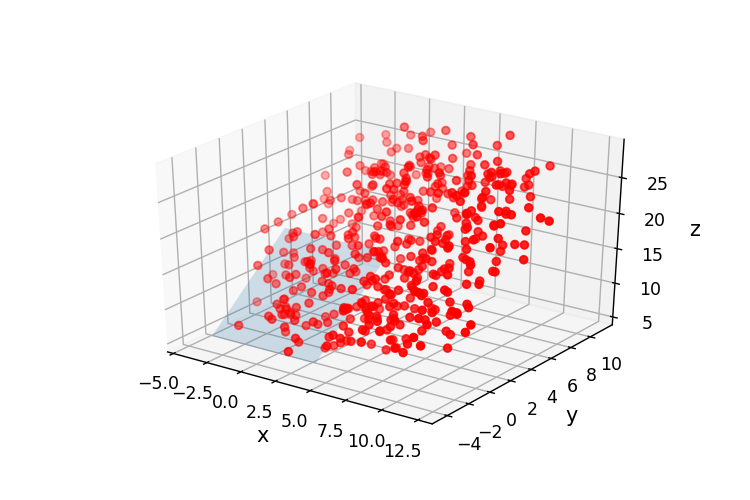

In [112]:
## We want to predict Z
xy = xyz[:,:2] # our inputs
z = xyz[:,2].reshape(-1,1) # our targets

lm = LinearRegression()
model = lm.fit(xy, z)

# tst_xy =  np.random.randn(1,2) 
# print(tst_xy)
# resulting_y = model.predict(tst_xy)
# print(resulting_y)
np.random.seed(0)
new_xy = np.random.randn(10000).reshape(-1,2)
# predicted_zz = model.predict(new_xy)

start_x = np.min(new_xy[:,0])
end_x = np.max(new_xy[:,0])
start_y = np.min(new_xy[:,1])
end_y = np.max(new_xy[:,1])
print(start_x)

fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], color = 'red')

# plot planes
x = np.linspace(start_x, end_x, len(new_xy))
y = np.linspace(start_y, end_y, len(new_xy))
xx, yy = np.meshgrid(x, y)

model_viz = np.array([x.flatten(), y.flatten()]).T
predicted_zz = model.predict(model_viz)

ax.plot_surface(xx, yy, predicted_zz, alpha=0.2)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()